<a href="https://colab.research.google.com/github/ozllzlme/ai_video/blob/main/Day2%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day2 실습에 오신것을 환영합니다**

Day 2에서 실습할 것은 간단한 지도학습(supervised learning)인 **linear regression**과 **logistic regression**입니다.

**Linear regression**과 **logistic regression**는 둘 다 regression이지만 **linear regression**은 train dataset의 독립변수 x와 종속변수 y의 관계를 선형 모델로 모델링하여 임의의 독립변수 x를 넣었을 때의 출력(종속 변수 y)를 예측하는 방법으로, 데이터를 잘 설명하는 모델 파라미터 (여기선 파란색 선)을 찾는 것으로 볼 수 있습니다.



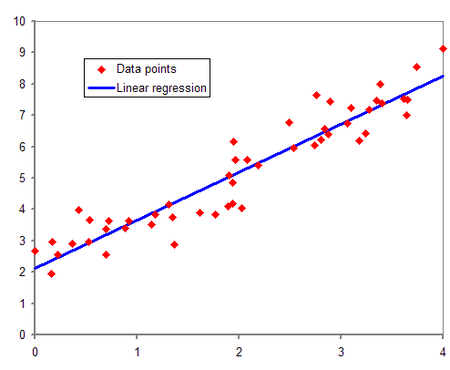



**Logistic regression**은 이종분류 문제(binary classification)에 사용되며, 정답(y)이  **linear regression**처럼 출력(종속 변수 y)이 연속적인 값이 아니라 0 또는 1에 가까운 값으로 출력되는 분류 모델로 training data를 잘 구분하는 경계(여기선 초록색 선)을 찾는 것이로 볼 수 있습니다.



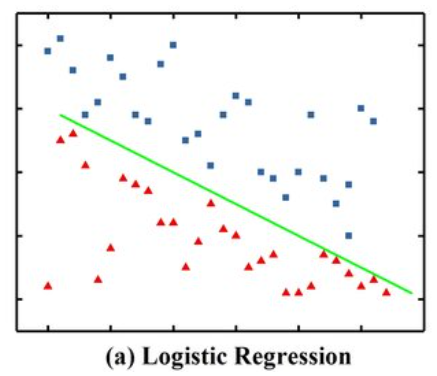

+$\alpha$) 회귀(regression)라는 단어의 어원이 궁금하시다면 밑의 블로그를 참조해보시면 될 것 같습니다.

https://bit.ly/3sEGrQg

# **Linear Regression**

# Hypothesis (가설 세우기)

독립변수 x에 따른 종속변수 y의 상관관계가 선형적(직선의 분포)일 것이라는 가정을 두고 수식을 구성합니다.

$$ H(x) = Wx + b $$

In [1]:
#hypothesis = x_train * W + b

# Cost function (or objective function, loss)
cost 함수는 가설의 결과(H(x))와 답(y)의 차이를 줄이기 위한 함수로 linear regression의 경우 MSE(mean square error loss)를 사용합니다.

$$ cost(W, b) = \frac{1}{m} \sum^m_{i=1} \left( H(x^{(i)}) - y^{(i)} \right)^2 $$

In [2]:
#cost = torch.mean((hypothesis - y_train) ** 2)

# Gradient descent

위의 cost함수로 가설의 결과(y)와 정답과의 차이를 미분하여 (예; back-propagation) cost를 줄이는 방향으로 기존 weight에 갱신하게 됩니다.

$\alpha$는 Learning rate로 한번 update 할때, 해당 기울기로 얼만큼 업데이트 할지를 결정하는 하이퍼파라미터 입니다.

$$ W := W - \alpha \frac{\partial}{\partial W} cost(W) $$

여기서 하이퍼파라메터라 함은 사용자가 임의로 설정하는 값으로, 매 문제나 상황마다 서로 다른 성능에 영향을 미치는 파라메터로 이를 Try-and-error로 튜닝해서 좋은 값을 찾기도 합니다.


**(Gradient descent와 back-propagation에 대한 자세한 내용은 미니특강 4에서 학습하게 됩니다. 그전까지는 가져다 사용하는 모듈로 생각하시길 바랍니다!)**


가장 적합한 weight를 찾는 과정은 **최적화**과정이고, 이는 PyTorch의 optmizer(`torch.optim`)를 통해 구현이 가능합니다.
학습하고자 하는 파라미터를 optimizer에 입력한뒤 매번 업데이트를 진행하면 최적의 weight에 가까워지게 됩니다. 아래 링크를 참고하여 실습을 진행하시길 바랍니다.

https://pytorch.org/docs/stable/optim.html


**[참고] optimizer의 종류는 매우 다양합니다. 우리가 풀고자 하는 문제에 맞는 optimizer를 찾아서 선택해주세요.**

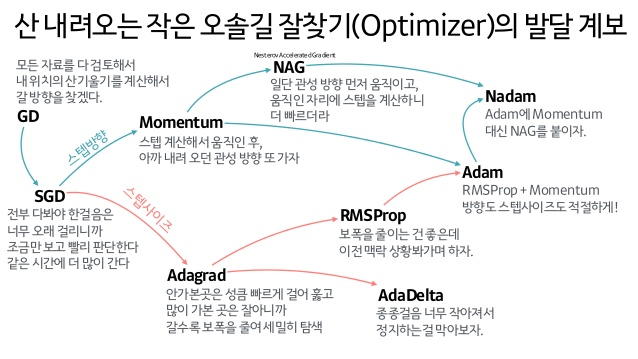

# **처음부터 끝까지 한번에 구현**


In [3]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


gdrive와 colab을 연동시켰다면 이전 1강에서 사용하였던 gdrive에 저장한 csv 파일을 가져와 사용해봅시다.

In [5]:
import pathlib
path = pathlib.Path('/content/gdrive/My Drive/health_data.csv')

df = pd.read_csv(path)
df = df.dropna(axis = 0).reset_index(drop=True)
height = torch.tensor(df.height)
weight = torch.tensor(df.weight)
x_train = height.view([height.shape[0],1]).float()
y_train = weight.view([weight.shape[0],1]).float()
df.head()

,Unnamed: 0,height,weight
0,0,158.9,52.015
1,1,173.6,66.910
2,2,174.4,66.000
3,4,154.0,49.275
4,5,177.7,69.820


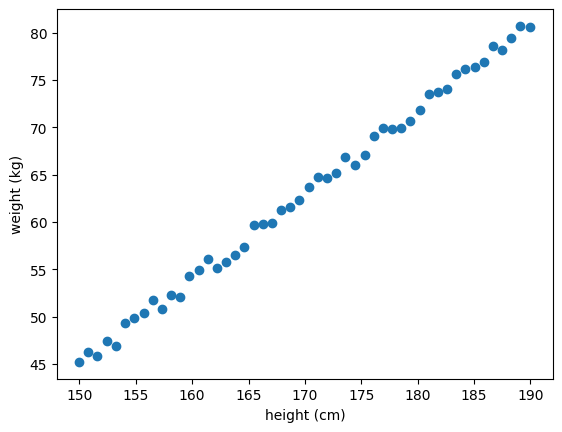

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

x = x_train
y = y_train

plt.scatter(x, y)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

In [10]:
#답안 작성

# Wieght와 bias
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# [Do it yourself] optimizer 설정(Parameter는 W,b이며, learnaing rate는 0.1로 시작해보고, 적당한 값을 튜닝해 보세요.)
# Hint: SGD 또는 많이 사용하는 Adam을 사용해서 optimizer를 생성해보세요
# Hint: PyTorch backward, PyTorch optimizer 등에 대해서 검색해보세요

optimizer = 0.1

# 경사 하강법을 반복 횟수 설정
epochs = 6000

for epoch in range(epochs + 1):
    # H(x) 계산
    hypothesis = W * x + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # [Do it yourself] cost로 H(x) 개선을 위한 update (update 순서 : zero_grad() -> backward() -> step())

    # 1000번마다 로그 출력
    if epoch % 1000 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/6000 W: 0.000, b: 0.000 Cost: 4071.079590
Epoch 1000/6000 W: 0.000, b: 0.000 Cost: 4071.079590
Epoch 2000/6000 W: 0.000, b: 0.000 Cost: 4071.079590
Epoch 3000/6000 W: 0.000, b: 0.000 Cost: 4071.079590
Epoch 4000/6000 W: 0.000, b: 0.000 Cost: 4071.079590
Epoch 5000/6000 W: 0.000, b: 0.000 Cost: 4071.079590
Epoch 6000/6000 W: 0.000, b: 0.000 Cost: 4071.079590


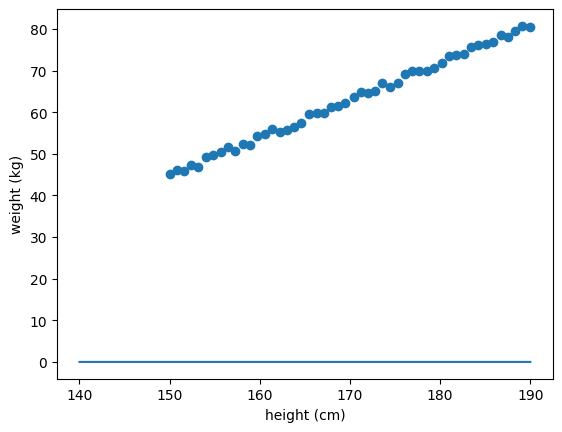

In [11]:
# 직선 시각화
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = x_train
y = y_train

plt.scatter(x, y)

t = np.arange(140.,190.,0.001)

plt.plot(t, W.item()*t+b.item())
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

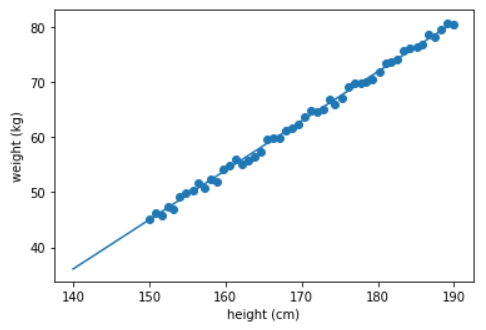

위와 같은 직선을 찾으셨다면 성공적으로 알고리즘을 구현하신 것입니다.

다음을 한번 곰곰히 생각해보시기 바랍니다.
- 지난 실습에서 했던 Random 모델 파라메터를 사용하는 방법과 Optimizer를 사용하는 방법의 차이를 고찰해보세요.
- 여러 Optimizer들과 하이퍼파라메터들을 바꾸어 사용하면서 성능 차이를 관찰해보세요
- 지난 실습처럼 데이터에 노이즈 (또는 outliter)를 강제로 삽입하여 보고, 어떻게 결과가 달라지는지 한번 확인해보세요. 그리고 어떻게 해야 더 노이즈에 강인한 결과를 얻을 수 있을지 고민해보시기 바랍니다.



---




# **Logistic Regression**

**Logistic regression**은 데이터를 두 개의 그룹으로 분류하는 문제에서 가장 기본적인 방법입니다. 위에서 배운 **Linear regression**에서는 우리가 원하는 것이 예측값(실수)이기 때문에 종속변수의 범위가 실수이지만 **Logistic regression**에서는 종속변수 y 값이 0에서 부터 1 사이 값을 갖습니다. 이를 이용해서 우리는 주어진 데이터를 분류할 때 0인지 1인지 예측하는 모델을 만들 수 있습니다.


우리는 0과 1을 분류하는 분류기를 만들려고 하면, y값이 0인 데이터들과 1인 데이터들 사이에서 급격하게 경계를 구분짓는 함수가 필요하게 됩니다. 정성적으로는 다음 그림과 같이 표현이 되지만 실제적으로 구현하기 위해서는 수식을 사용해야 하기 때문에 **sigmoid**라는 함수를 도입하게 됩니다.

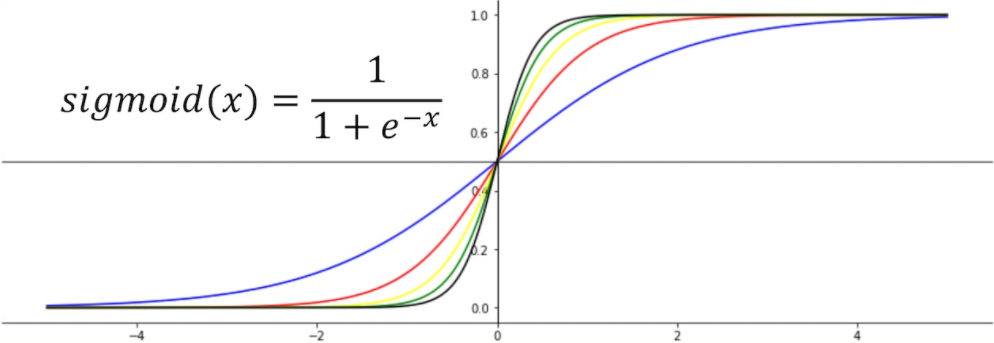

**Sigmoid function**


$$ sigmoid(z) = \frac{1}{1+e^{-z}} $$

sigmoid 함수는 z의 값에 따라서 위의 그림처럼 기울기가 다양해집니다. $$z = a x$$라고 할 때 a의 값이 커질수록 위의 검은색 그래프처럼 기울기가 가파르게 되어 step function(계단모양의 함수)에 가깝게 됩니다.

+$\alpha$) 추가적으로 sigmoid 함수를 왜 쓰는지에 대해 수학적으로 조금 더 알고싶다면 하단의 링크를 들어가서 확인해보시기 바랍니다.

https://icim.nims.re.kr/post/easyMath/64

# Hypothesis

$ H(X) = \frac{1}{1+e^{-z}} $, where $ z = W^T X + b $

z는 선형적인 형태의 식이지만, 일반적으로 분류를 위한 입력 데이터 $X$는 고차원의 벡터가 많기 때문에 기울기($W$)와 데이터($X$)는 내적의 형태가 됩니다.

In [12]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [13]:
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [14]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))


# Cost function



$$ cost(W, b) = -\frac{1}{m} \sum y \log\left(H(x)\right) + (1-y) \left( \log(1-H(x) \right) $$

**Linear regression**의 경우는 **MSE**를 이용하여 loss를 구한 반면 **logistic regression**은 **binary cross-entropy**를 이용하여 loss를 구하게 됩니다.


cost function의 목적은 답안에 해당하는 y(0 또는 1)와 sigmoid 함수를 통해 예측한 값인 H(x)간의 차이를 줄이는 것이기 때문에 y가 1일때 H(x)가 0에 가까운 값이 나온다면 log(H(x))가 굉장히 큰 음수 값이 나오고, y가 0일때 H(x)가 1에 가까운 값이 나오면 log(1-H(x))가 큰 음수 값이 나오기 때문에, 전체 Cost가 커지게 됩니다. 이렇게 정답 y 와 예측 값이 일치하는 답이 나올 수 있도록 위 cost를 줄이는 방향으로 모델 파라메터 $W,b$ 를 업데이트 합니다. 이전과 마찬가지로 이때 미분을 값을 통해 최적화 하는 방법으로 gradient descent (back-propagation)를 기반으로한 최적화를 사용합니다.


+$\alpha$) 정성적인 설명 외에, 수학적인 근거를 알고싶다면 하단의 링크를 확인해보세요.

https://curt-park.github.io/2018-09-19/loss-cross-entropy/

+$\alpha$) logistic regression에서 MSE를 cost function으로 사용하면 안되는 자세한 이유가 궁금하시다면 하단의 링크를 참조하시면 됩니다.

https://bit.ly/2M1dU6T

In [15]:
losses = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis))

In [16]:
cost = losses.mean()

# Gradient decent

위의 cost함수로 가설의 결과(y)와 정답과의 차이를 미분하여 back-propagation을 실행함으로써, 기존 weight를 업데이트하는 방향을 설정하게 됩니다.

$\alpha$는 Learning rate로 한번 update 할때 기울기의 크기를 설정하는데 관여하게 됩니다.

$$ W := W - \alpha \frac{\partial}{\partial W} cost(W) $$

# **처음부터 끝까지 한번에 구현**
본 실습도 앞선 **linear regression** 구현과 마찬가지로, cost function과 optimizer를 정의하고, backward() 함수를 통해 업데이트하여, 최적의 weight를 찾아갑니다.

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
x_data = [[1, -4], [1, 2], [2, 3], [3, 1],[4, -2], [4, 3], [5, 3], [6, 2], [3, 8], [6, -2]]
y_data = [[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [19]:
#답안 작성

# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.Adam([W, b], lr=0.01)

nb_epochs = 5000
for epoch in range(nb_epochs + 1):

    # [Do it yourself] hypothesis 계산
    hypothesis = 1/(1+torch.exp(-(x_train.matmul(W)+b)))

    # [Do it yourself] Cost 계산
    cost = -(y_train * torch.log(hypothesis) + (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # [Do it yourself] optimizer와 cost를 이용해 모델 파라메터 W,b를 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/5000 Cost: 0.693147
Epoch  100/5000 Cost: 0.442445
Epoch  200/5000 Cost: 0.351426
Epoch  300/5000 Cost: 0.289290
Epoch  400/5000 Cost: 0.244120
Epoch  500/5000 Cost: 0.209718
Epoch  600/5000 Cost: 0.182610
Epoch  700/5000 Cost: 0.160700
Epoch  800/5000 Cost: 0.142635
Epoch  900/5000 Cost: 0.127506
Epoch 1000/5000 Cost: 0.114669
Epoch 1100/5000 Cost: 0.103659
Epoch 1200/5000 Cost: 0.094128
Epoch 1300/5000 Cost: 0.085813
Epoch 1400/5000 Cost: 0.078507
Epoch 1500/5000 Cost: 0.072048
Epoch 1600/5000 Cost: 0.066308
Epoch 1700/5000 Cost: 0.061179
Epoch 1800/5000 Cost: 0.056578
Epoch 1900/5000 Cost: 0.052433
Epoch 2000/5000 Cost: 0.048685
Epoch 2100/5000 Cost: 0.045285
Epoch 2200/5000 Cost: 0.042190
Epoch 2300/5000 Cost: 0.039366
Epoch 2400/5000 Cost: 0.036781
Epoch 2500/5000 Cost: 0.034410
Epoch 2600/5000 Cost: 0.032230
Epoch 2700/5000 Cost: 0.030221
Epoch 2800/5000 Cost: 0.028366
Epoch 2900/5000 Cost: 0.026650
Epoch 3000/5000 Cost: 0.025061
Epoch 3100/5000 Cost: 0.023585
Epoch 32

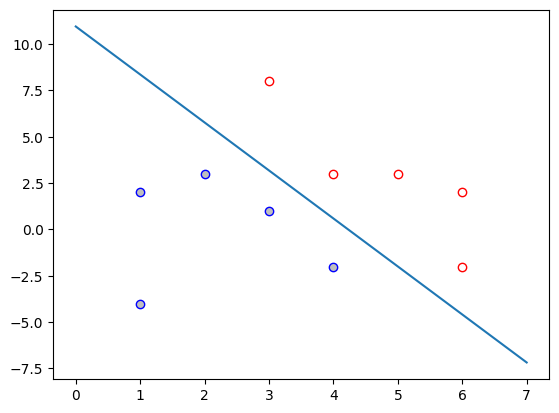

In [20]:
# Cost가 0.01 이하로 작아질 경우 학습이 잘 된것으로 볼 수 있습니다.
# classifier가 잘 학습되었는지 시각화 합니다.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x_data = [[1, -4], [1, 2], [2, 3], [3, 1],[4, -2], [4, 3], [5, 3], [6, 2], [3, 8], [6, -2]]
y_data = [[0], [0], [0], [0], [0], [1], [1], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

x = x_train
y = y_train

W_x = W[0][0].detach().numpy()
W_y = W[1][0].detach().numpy()
b = b.detach().numpy()

for i in range(len(x_data)):
  if y_data[i][0]:
    plt.scatter(x_data[i][0], x_data[i][1], color='1', edgecolor="r")
  else:
    plt.scatter(x_data[i][0], x_data[i][1], color='0.75', edgecolor="b")

t = np.arange(0.,7.,0.001)
plt.plot(t, -(W_x/W_y)*t- b/W_y)
plt.show()

아래와 같이 데이터의 y값(0 또는 1)에 따라 분리하는 직선을 찾으셨다면 성공적으로 실습을 완료하신 것입니다.

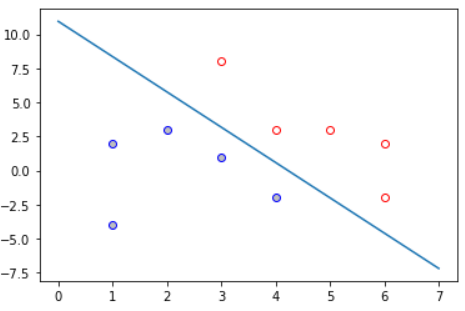

# **이미지 load 하기**

우리가 주로 사용한 이미지 데이터를 load하고, 시각화하는 방법에 대해 학습합니다.
이미지를 load하기 위해서는 `opencv`, `PIL` 등 여러 라이브러리를 활용할 수 있고, 시각화를 위해서 `opencv`, 혹은 `matplotlib` 라이브러리를 사용할 수 있습니다.

<참고자료>

https://docs.opencv.org/4.x/

https://pillow.readthedocs.io/en/stable/

https://matplotlib.org/stable/index.html

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NNa7GzYfj7h7-nGj-RfUKF6mEggZ03S7
To: /content/kitten.jpg
100% 21.4k/21.4k [00:00<00:00, 36.9MB/s]


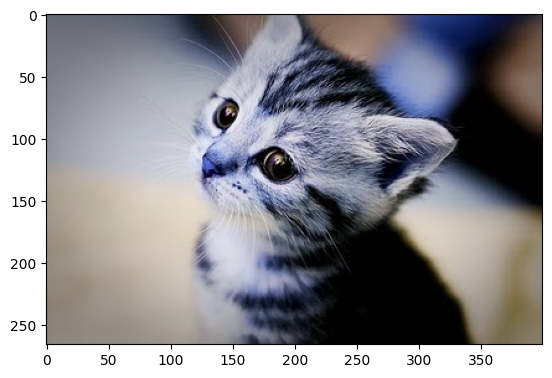

In [21]:
from imageio import imread
import cv2
import matplotlib.pyplot as plt

# 이미지 준비
kitten_path = "kitten.jpg"
! gdown --id   1NNa7GzYfj7h7-nGj-RfUKF6mEggZ03S7 -O $kitten_path

# opencv를 이용하여 이미지 load 후 시각화
Img = cv2.imread(kitten_path)
plt.imshow(Img)
plt.show()

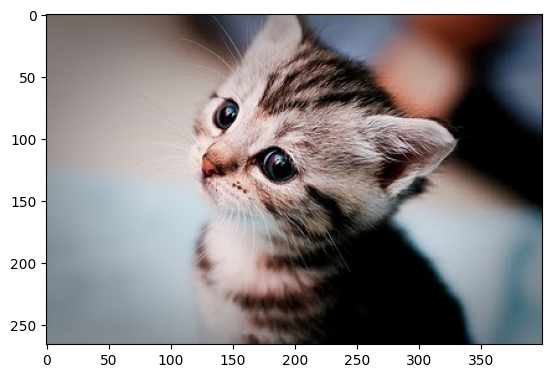

In [22]:
from PIL import Image

# PIL을 이용하여 이미지 load후 시각화
Img_ = Image.open(kitten_path)
plt.imshow(Img_)
plt.show() # image will not be displayed without this

`PIL`과 `opencv`를 활용하여 이미지를 각각 load한 뒤, 동일한 `matplotlib`를 사용하여 시각화를 했지만, 색상이 다른것을 확인할 수 있습니다. 동일한 시각화 함수를 사용하였음에도 색상이 다른 이유에 대해서 고찰해보시길 바랍니다.

[Hint] 이미지는 (H, W, C)의 크기를 갖고, 이 때 C(채널)의 의미

**수고하셨습니다**